In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns #modern visualization

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("deliveries.csv")
mf = pd.read_csv("matches.csv")
ipl = pd.read_csv("ipl.csv")

In [ ]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


### Removing inconsistent teams as they donot play anymore.

In [ ]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']
df = df[(df['batting_team'].isin(consistent_teams)) & (df['bowling_team'].isin(consistent_teams))]

In [ ]:
df.shape

(106567, 21)

In [ ]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']
mf = mf[(mf['team1'].isin(consistent_teams)) & (mf['team2'].isin(consistent_teams))& 
        (mf['toss_winner'].isin(consistent_teams))& 
        (mf['winner'].isin(consistent_teams))]

In [ ]:
mf.shape

(449, 18)

In [ ]:
ipl.shape

(76014, 15)

In [ ]:
ipl = ipl[(ipl['bat_team'].isin(consistent_teams)) & (ipl['bowl_team'].isin(consistent_teams))]

In [ ]:
ipl.shape

(53811, 15)

In [ ]:
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [ ]:
mf.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [ ]:
df.shape

(106567, 21)

In [ ]:
mf.shape

(449, 18)

In [ ]:
ipl.shape

(53811, 15)

In [ ]:
df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    101321
dismissal_kind      101321
fielder             102780
dtype: int64

In [ ]:
mf.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              1
umpire2              1
umpire3            449
dtype: int64

In [ ]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,106567.000000,106567.000000,106567.000000,106567.000000,106567.000000,106567.000000,106567.000000,106567.000000,106567.000000,106567.000000,106567.000000,106567.000000,106567.000000
mean,335.110832,1.481941,10.131316,3.618803,0.000638,0.038671,0.004945,0.022831,0.004307,0.000047,1.226318,0.070801,1.297118
std,181.263467,0.502074,5.674065,1.809416,0.025253,0.263224,0.115694,0.204014,0.073457,0.015316,1.598347,0.356593,1.587105
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,361.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,495.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [ ]:
df["batting_team"].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Mumbai Indians',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [ ]:
df["bowling_team"].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

#### Fequency of all 20 Overs : we can see 1st over is thrown most number od the time - this can be because after 1st over rain has stopped the play or superover is also considered as 1st and rest of the trend is also because of the same reason. Last 5 overs are played less bacause the team chasing, can win the match in less then 20 overs also. 

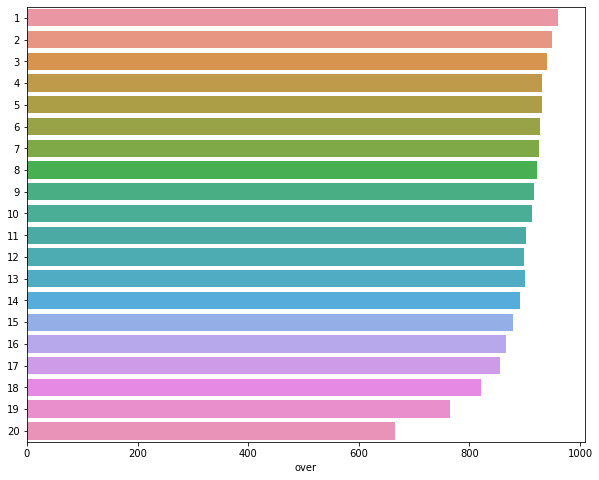

In [ ]:
plt.figure(figsize=(10,8))
data = (df.over.value_counts()/6)
sns.barplot(y = data.index, x = data, orient='h')

In [ ]:
mf.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,449.00000,449.000000,449.000000,449.000000,449.000000,0.0
mean,333.91314,2012.472160,0.026726,14.458797,3.383073,NaN
std,181.99167,2.707423,0.161462,24.707733,3.434369,NaN
min,1.00000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,168.00000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,360.00000,2013.000000,0.000000,0.000000,4.000000,NaN
75%,494.00000,2015.000000,0.000000,22.000000,7.000000,NaN
max,636.00000,2017.000000,1.000000,146.000000,10.000000,NaN


In [ ]:
mf.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
mf["winner"].value_counts()

Mumbai Indians                 77
Chennai Super Kings            68
Kolkata Knight Riders          62
Royal Challengers Bangalore    56
Kings XI Punjab                55
Rajasthan Royals               51
Delhi Daredevils               46
Sunrisers Hyderabad            34
Name: winner, dtype: int64

In [ ]:
mf["toss_winner"].value_counts()

Mumbai Indians                 74
Kolkata Knight Riders          63
Delhi Daredevils               61
Chennai Super Kings            58
Royal Challengers Bangalore    57
Kings XI Punjab                55
Rajasthan Royals               53
Sunrisers Hyderabad            28
Name: toss_winner, dtype: int64

In [ ]:
mf["player_of_match"].value_counts().head(10)

CH Gayle      13
G Gambhir     12
DA Warner     12
MEK Hussey    11
SK Raina      10
MS Dhoni       9
YK Pathan      9
KA Pollard     9
JH Kallis      9
SR Watson      9
Name: player_of_match, dtype: int64

#### Here we can see "CH gayle" is the most valuable player as he has won most no. of "Player of the Match"

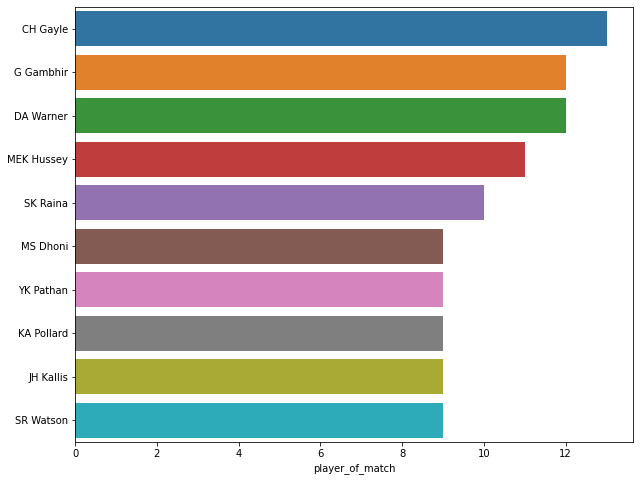

In [ ]:
#mf["player_of_match"].value_counts().head(15).plot(kind="bar", figsize=(8,8))
plt.figure(figsize=(10,8))
data = mf.player_of_match.value_counts().head(10)
sns.barplot(y = data.index, x = data, orient='h')

#### This shows that 2013,2014,2015 had most no. of matches

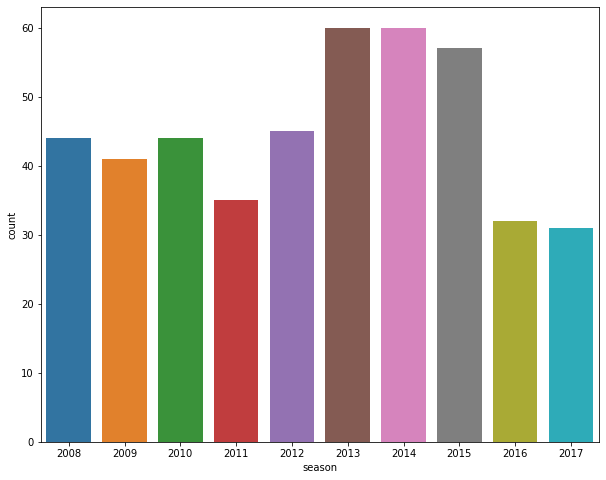

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='season', data=mf)
plt.show()

#### "Mumbai Indians" have won the highest number of times combining all the seasons

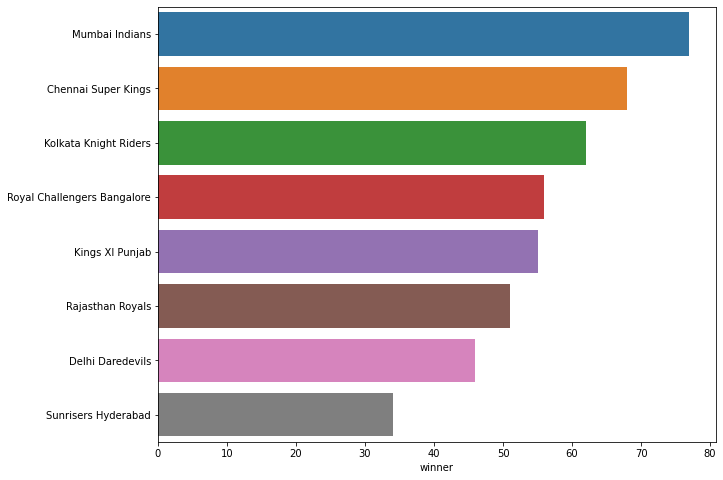

In [ ]:
plt.figure(figsize=(10,8))
data = mf.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')

#### "Mumbai Indians" have won the highest number of toss as well. Here we can see from the above chart top 5 teams winning highest number of matches is same as the team winning highest number of toss.

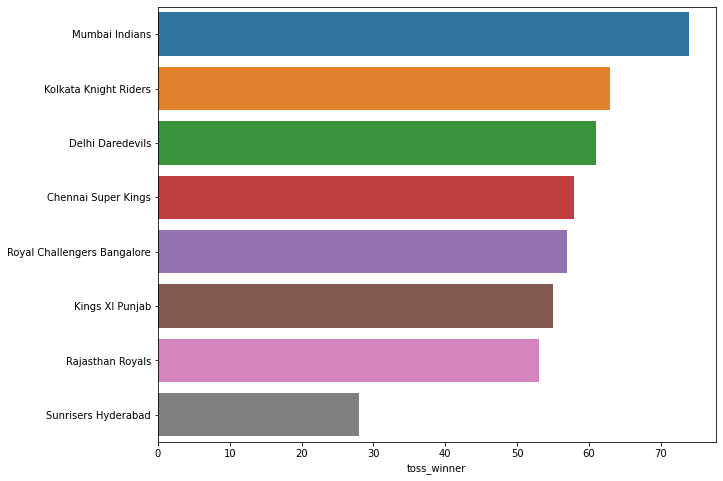

In [ ]:
plt.figure(figsize=(10,8))
data = mf.toss_winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')

#### If we ask Has Toss-winning helped in Match-winning? 

In [ ]:
ss = mf['toss_winner'] == mf['winner']

ss.groupby(ss).size()

False    226
True     223
dtype: int64

####  How many Toss winning teams have won the matches?

In [ ]:
round(ss.groupby(ss).size() / ss.count() * 100,2)

False    50.33
True     49.67
dtype: float64

#### Here we can see it is 50-50 chances of winning the game if a team has won the toss.

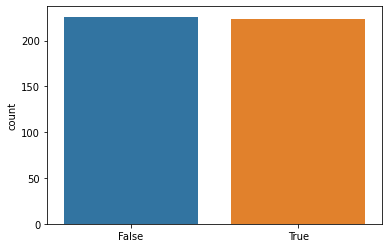

In [ ]:
sns.countplot(ss);

H0: There is no relation between winning of toss with wining of match
H1: There is relation between winning of toss with wining of     match


In [ ]:
#from scipy.stats  import chi2_contingency
#stat, p,a,b=chi2_contingency(ss,) 
from scipy.stats import chi2_contingency

def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))
stat,p,dof,expected=chisq_of_df_cols(mf, 'toss_winner', 'winner')
print(p)

5.28580555716009e-91


As the p value is very less, we reject the null hypothesis.

### Team Performance

In [ ]:
mf[mf['win_by_runs']>0].groupby(['winner'])['win_by_runs'].apply(np.median).sort_values(ascending = False)

winner
Rajasthan Royals               31.0
Delhi Daredevils               27.0
Mumbai Indians                 25.0
Royal Challengers Bangalore    24.0
Chennai Super Kings            24.0
Kolkata Knight Riders          23.0
Kings XI Punjab                20.5
Sunrisers Hyderabad            18.0
Name: win_by_runs, dtype: float64

#### Rajasthan Royals has performed best as compared in terms of "win by runs"

In [ ]:
mf[mf['win_by_wickets']>0].groupby(['winner'])['win_by_wickets'].apply(np.median).sort_values(ascending = False)

winner
Sunrisers Hyderabad            7.0
Royal Challengers Bangalore    7.0
Kolkata Knight Riders          7.0
Rajasthan Royals               6.0
Mumbai Indians                 6.0
Kings XI Punjab                6.0
Delhi Daredevils               6.0
Chennai Super Kings            6.0
Name: win_by_wickets, dtype: float64

#### All the teams has performed same  in terms of "win by wickets"

#### THE CHOICE TO SELECT WHETHER TO TAKE BAT OR FIELD DIFFER IN DIFFERENT SEASONS

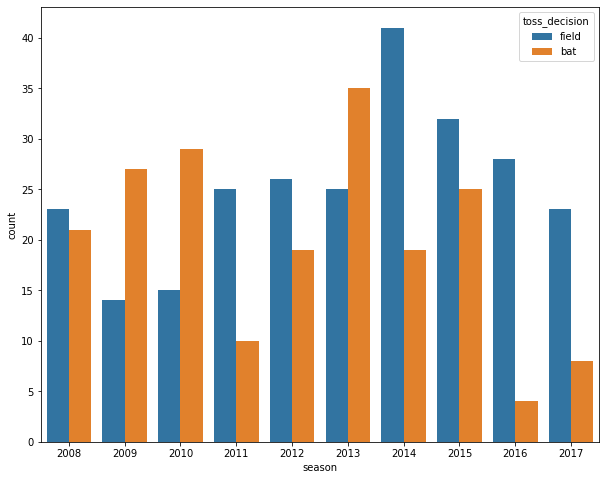

In [ ]:

plt.figure(figsize=(10,8))
sns.countplot(x="season",hue="toss_decision",data=mf)
plt.show()

In [ ]:
most_home_wins = mf[mf['result'] == 'normal'][mf['team1'] == mf['winner']]['team1'].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


#### "Mumbai Indians" has won highest number of matches while playing in their home ground.

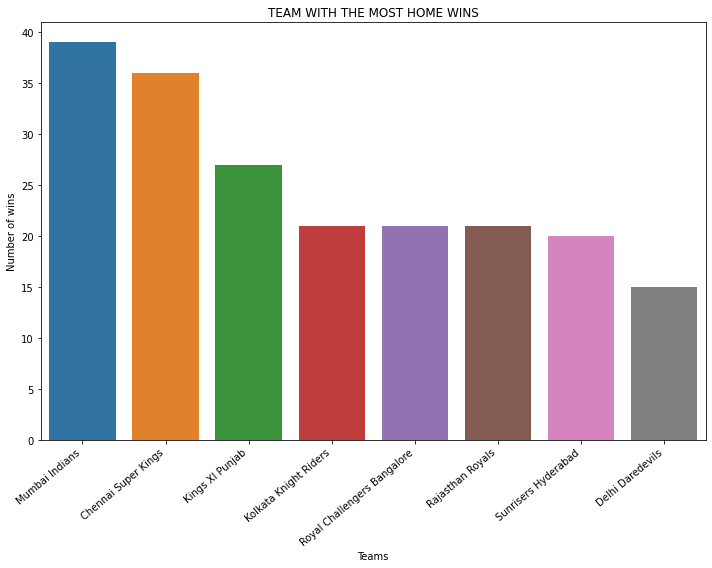

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x = most_home_wins.index, y = most_home_wins.values, units = most_home_wins.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Teams')
ax.set_ylabel('Number of wins')
ax.set_title('TEAM WITH THE MOST HOME WINS')
plt.tight_layout()


## Modelling !!!

In [ ]:

ipl.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [ ]:
ipl.shape

(53811, 15)

In [ ]:
ipl["bat_team"].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [ ]:
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']

print('Before removing unwanted columns: {}'.format(ipl.shape))
ipl.drop(labels=columns_to_remove, axis=1, inplace=True)
print('After removing unwanted columns: {}'.format(ipl.shape))

Before removing unwanted columns: (53811, 15)
After removing unwanted columns: (53811, 9)


In [ ]:
ipl.columns

Index(['date', 'bat_team', 'bowl_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [ ]:
ipl.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [ ]:
# Removing the first 5 overs data in every match
ipl = ipl[ipl['overs']>=5.0]

In [ ]:
ipl.shape

(40108, 9)

In [ ]:
from datetime import datetime
ipl['date'] = ipl['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

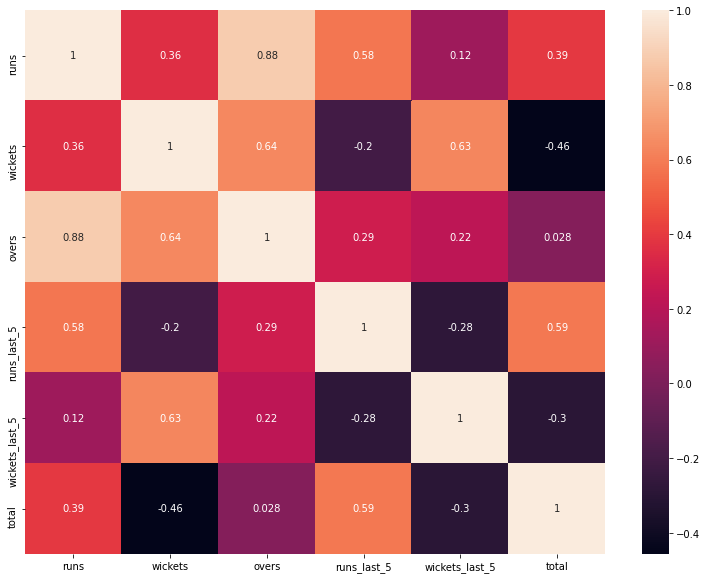

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
corr_matrix = ipl.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=ipl[top_corr_features].corr(), annot=True)

In [ ]:
# Converting categorical features using OneHotEncoding method
encoded_ipl = pd.get_dummies(data=ipl, columns=['bat_team', 'bowl_team'])
encoded_ipl.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [ ]:
encoded_ipl.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Rearranging the columns
encoded_ipl = encoded_ipl[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [ ]:
# Splitting the data into train and test set
X_train = encoded_ipl.drop(labels='total', axis=1)[encoded_ipl['date'].dt.year <= 2016]
X_test = encoded_ipl.drop(labels='total', axis=1)[encoded_ipl['date'].dt.year >= 2017]

y_train = encoded_ipl[encoded_ipl['date'].dt.year <= 2016]['total'].values
y_test = encoded_ipl[encoded_ipl['date'].dt.year >= 2017]['total'].values

# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

print("Training set: {} and Test set: {}".format(X_train.shape, X_test.shape))

Training set: (37330, 21) and Test set: (2778, 21)


In [ ]:
#Hypothesis Testing

In [ ]:
#Model Building

In [ ]:

# Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(linear_regressor.intercept_, linear_regressor.coef_)

165.7328206951017 [ 1.07652799 -2.26502957  0.57640187 -2.96316175  2.85740487 -3.70926822
  3.85007173  0.57705308  0.13499716  0.85400686  1.61346247 -3.36235712
  0.19380598  0.29179034  0.68934312 -0.41504881 -6.37127207  0.96320203
 -4.88540989 -0.01670462 -1.1550842 ]


In [ ]:
# Predicting results
y_pred_lr = linear_regressor.predict(X_test)

In [ ]:
# Linear Regression - Model Evaluation
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 12.11861754619329
Mean Squared Error (MSE): 251.00792310417438
Root Mean Squared Error (RMSE): 15.843229566732106


In [ ]:
accuracy = linear_regressor.score(X_test,y_test)
print(accuracy*100,'%')

75.22633566350527 %


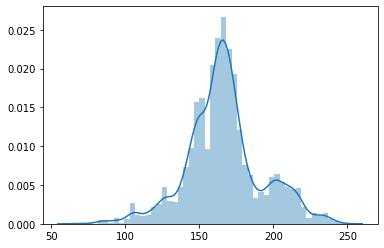

In [ ]:
sns.distplot(y_pred_lr)

In [ ]:
#### applying OLS

In [ ]:
import statsmodels.api as sm

In [ ]:

new_x = sm.add_constant(X_train)
line_regressor = sm.OLS(y_train, new_x).fit()

In [ ]:
print(line_regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     3650.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        10:36:50   Log-Likelihood:            -1.5988e+05
No. Observations:               37330   AIC:                         3.198e+05
Df Residuals:                   37310   BIC:                         3.200e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [ ]:
# Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# Predicting results
y_pred_dt = decision_regressor.predict(X_test)

In [ ]:
# Decision Tree Regression - Model Evaluation
print("---- Decision Tree Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_dt)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_dt)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_dt))))

---- Decision Tree Regression - Model Evaluation ----
Mean Absolute Error (MAE): 17.09791216702664
Mean Squared Error (MSE): 537.1799856011519
Root Mean Squared Error (RMSE): 23.17714360315248


In [ ]:
accuracy = decision_regressor.score(X_test,y_test)
print(accuracy*100,'%')

46.98208531830726 %


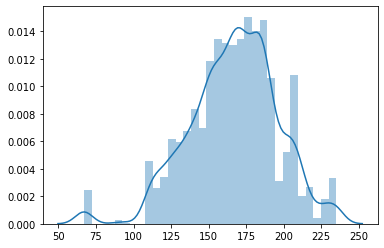

In [ ]:
sns.distplot(y_pred_dt)

Since Linear Regression model performs best with 75% accuracy as compared to Decision Tree with 50%, we use Linear Regression model

In [ ]:
### building a predict score function for Predicting the score

In [ ]:
def predict_score(batting_team='Chennai Super Kings', bowling_team='Mumbai Indians', overs=5.1, runs=50, wickets=0, runs_in_prev_5=50, wickets_in_prev_5=0):
    temp_array = list()



  # Batting Team
    if batting_team == 'Chennai Super Kings':
        temp_array = temp_array + [1,0,0,0,0,0,0,0]
    elif batting_team == 'Delhi Daredevils':
        temp_array = temp_array + [0,1,0,0,0,0,0,0]
    elif batting_team == 'Kings XI Punjab':
        temp_array = temp_array + [0,0,1,0,0,0,0,0]
    elif batting_team == 'Kolkata Knight Riders':
         temp_array = temp_array + [0,0,0,1,0,0,0,0]
    elif batting_team == 'Mumbai Indians':
        temp_array = temp_array + [0,0,0,0,1,0,0,0]
    elif batting_team == 'Rajasthan Royals':
        temp_array = temp_array + [0,0,0,0,0,1,0,0]
    elif batting_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0,0,0,0,0,0,1,0]
    elif batting_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Bowling Team
    if bowling_team == 'Chennai Super Kings':
        temp_array = temp_array + [1,0,0,0,0,0,0,0]
    elif bowling_team == 'Delhi Daredevils':
        temp_array = temp_array + [0,1,0,0,0,0,0,0]
    elif bowling_team == 'Kings XI Punjab':
        temp_array = temp_array + [0,0,1,0,0,0,0,0]
    elif bowling_team == 'Kolkata Knight Riders':
        temp_array = temp_array + [0,0,0,1,0,0,0,0]
    elif bowling_team == 'Mumbai Indians':
        temp_array = temp_array + [0,0,0,0,1,0,0,0]
    elif bowling_team == 'Rajasthan Royals':
        temp_array = temp_array + [0,0,0,0,0,1,0,0]
    elif bowling_team == 'Royal Challengers Bangalore':
        temp_array = temp_array + [0,0,0,0,0,0,1,0]
    elif bowling_team == 'Sunrisers Hyderabad':
        temp_array = temp_array + [0,0,0,0,0,0,0,1]

  # Overs, Runs, Wickets, Runs_in_prev_5, Wickets_in_prev_5
    temp_array = temp_array + [overs, runs, wickets, runs_in_prev_5, wickets_in_prev_5]

  # Converting into numpy array
    temp_array = np.array([temp_array])

  # Prediction
    return int(linear_regressor.predict(temp_array)[0])

Prediction 1
• Date: 14th April 2017
• IPL : Season 12
• Match number: 30
• Teams: Sunrisers Hyderabad vs. Delhi Daredevils
• First Innings final score: 155/7




In [ ]:
final_score = predict_score(batting_team='Delhi Daredevils', bowling_team='Sunrisers Hyderabad', overs=11.5, runs=98, wickets=3, runs_in_prev_5=41, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))


The final predicted score (range): 157 to 172


Prediction 2 : 
  Date: 30th March 2017
  • IPL : Season 12
  • Match number: 9
  • Teams: Mumbai Indians vs. Kings XI Punjab
  • First Innings final score: 176/7

In [ ]:
final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Kings XI Punjab', overs=12.3, runs=113, wickets=2, runs_in_prev_5=55, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))


The final predicted score (range): 179 to 194


In [ ]:

final_score = predict_score(batting_team='Kolkata Knight Riders', bowling_team='Royal Challengers Bangalore', 
                            overs=5.2, runs=59, wickets=0, runs_in_prev_5=59, wickets_in_prev_5=0)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 176 to 191


In [ ]:

final_score = predict_score(batting_team='Mumbai Indians', bowling_team='Rajasthan Royals', 
                            overs=8.4, runs=50, wickets=2, runs_in_prev_5=35, wickets_in_prev_5=1)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 142 to 157


In [ ]:

final_score = predict_score(batting_team='Royal Challengers Bangalore', bowling_team='Delhi Daredevils', 
                            overs=10, runs=75, wickets=3, runs_in_prev_5=60, wickets_in_prev_5=2)
print("The final predicted score (range): {} to {}".format(final_score-10, final_score+5))

The final predicted score (range): 150 to 165
